# Sigrid Juselius 2022

In [28]:
'''

If SAVE_FILES set to True, the script will generate processed data files and plots.
False by default.

If VERBOSE set to True, the script will output additional information.
False by default.
'''
SAVE_FILES = False
VERBOSE = False

## Import packages and set data folders 

In [29]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import sys
import pickle as pkl

In [73]:
DATASET_PATH = "/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON/"
SCRIPTS_PATH = "/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/"
%cd {DATASET_PATH}
%pwd

/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON


'/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

## Data Cleaning

In [74]:
meta_data = pd.read_csv("META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
meta_data.head()

,Unnamed: 0,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No


In [75]:
anthropometry = pd.read_csv("Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv")
anthropometry["BMI"] = anthropometry["Weight_kg"]/((anthropometry["Height_cm"]/100)**2)
anthropometry.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
count,228.000000,228.000000,227.000000,227.000000,228.000000
mean,174.759211,74.099079,84.362115,95.362996,24.232279
std,10.236729,13.054842,12.049521,9.958975,3.634442
min,145.000000,48.000000,60.000000,70.000000,17.930787
25%,167.425000,64.250000,75.800000,89.250000,21.545560
50%,175.000000,72.850000,83.000000,95.000000,23.664355
75%,182.825000,82.650000,92.000000,101.000000,26.076901
max,199.500000,113.900000,127.000000,126.000000,36.649262


<AxesSubplot:>

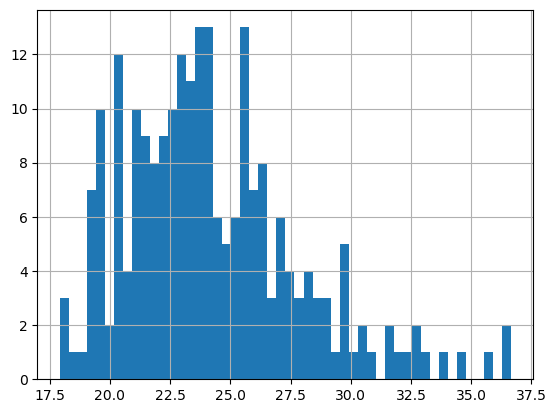

In [76]:
anthropometry["BMI"].hist(bins=50)

In [77]:
anthropometry

,Unnamed: 0,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
0,sub-032301,162.0,78.00,97.0,111.0,29.721079
1,sub-032302,164.5,64.30,70.0,102.0,23.761791
2,sub-032303,166.5,101.60,113.0,123.0,36.649262
3,sub-032304,184.6,87.60,95.0,93.5,25.706368
4,sub-032305,171.5,71.19,83.0,107.0,24.204201
...,...,...,...,...,...,...
223,sub-032524,182.2,69.70,75.5,98.0,20.995974
224,sub-032525,175.8,72.50,75.6,85.0,23.458501
225,sub-032526,186.2,90.40,93.0,107.0,26.074085
226,sub-032527,192.1,87.40,84.0,91.0,23.684090


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [79]:
cognitive_tests_path = "Cognitive_Test_Battery_LEMON"
emotion_personality_tests_path = "Emotion_and_Personality_Test_Battery_LEMON"
cognitive_tests_folders = os.listdir(cognitive_tests_path)
for i in cognitive_tests_folders:
    if i == '.DS_Store':
        cognitive_tests_folders.remove(i)
cognitive_tests_path_full = [os.path.join(cognitive_tests_path, s) for s in cognitive_tests_folders]
tests_path_full = cognitive_tests_path_full + [emotion_personality_tests_path]
df_list = []
for folder in tests_path_full:
    for file in os.listdir(folder):
        if '.' in file:
            if file.split('.')[1] == 'csv':
                filepath = os.path.join(folder, file)
                df_list.append(pd.read_csv(filepath))

data = anthropometry
data = data.rename(columns={'Unnamed: 0':'id'}).set_index('id')
count = 0
for dataset in df_list:
    dataset = dataset.rename(columns={'Unnamed: 0':'id'})
    data = data.join(dataset.set_index('id'))
    count += 1

In [80]:
if VERBOSE:
    data.head()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_3,TAP_WM_4,TAP_WM_5,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,93,219.0,46,...,4.0,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,18,279.0,18,...,3.0,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,95,122.0,88,...,2.0,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,10,209.0,34,...,3.0,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,90,126.0,73,...,4.0,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0


In [81]:
if VERBOSE:
    data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 262 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Height_cm                      float64
 1    Weight_kg                      float64
 2    Waist_cm                       float64
 3    Hip_cm                         float64
 4    BMI                            float64
 5    TAP_WM_1                       float64
 6    TAP_WM_2                       float64
 7    TAP_WM_3                       object 
 8    TAP_WM_4                       float64
 9    TAP_WM_5                       object 
 10   TAP_WM_6                       int64  
 11   TAP_WM_7                       int64  
 12   TAP_WM_8                       object 
 13   TAP_WM_9                       int64  
 14   TAP_WM_10                      object 
 15   TAP_WM_11                      int64  
 16   TAP_WM_12                      object 
 17   TAP_A_1               

In [82]:
if VERBOSE:
    data._get_numeric_data().info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       227 non-null    float64
 3    Hip_cm                         227 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       227 non-null    float64
 6    TAP_WM_2                       227 non-null    float64
 7    TAP_WM_4                       227 non-null    float64
 8    TAP_WM_6                       228 non-null    int64  
 9    TAP_WM_7                       228 non-null    int64  
 10   TAP_WM_9                       228 non-null    int64  
 11   TAP_WM_11                      228 non-null    int64  
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_26425/493814805.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data._get_numeric_data().info(verbose=True, null_counts=True)


In [83]:
data_num = data._get_numeric_data()

In [84]:
if VERBOSE:
    [data.shape, data_num.shape]

[(228, 262), (228, 219)]

In [85]:
# Replace NAs with medians

for col in data_num.columns:
    median = data_num[col].median()
    data_num[col].fillna(median, inplace=True)

data_num.shape

(228, 219)

In [86]:
if VERBOSE:
    data_num.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,174.759211,74.099079,84.356140,95.361404,24.232279,581.79386,547.346491,181.100877,13.070175,2.157895,...,4.048246,2.710526,5.486842,4.263158,6.197368,5.456140,4.565789,2.723684,3.078947,5.701754
std,10.236729,13.054842,12.023289,9.937044,3.634442,156.25089,154.677006,88.119629,2.475321,3.025818,...,1.534435,1.158943,1.708956,1.314458,1.198601,1.493837,1.487115,1.339985,1.206770,1.303535
min,145.000000,48.000000,60.000000,70.000000,17.930787,92.00000,315.000000,21.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,167.425000,64.250000,75.900000,89.375000,21.545560,471.00000,435.500000,121.000000,12.000000,0.000000,...,3.000000,2.000000,4.000000,3.000000,5.750000,4.000000,4.000000,2.000000,2.000000,5.000000
50%,175.000000,72.850000,83.000000,95.000000,23.664355,557.00000,524.000000,163.000000,14.000000,1.000000,...,4.000000,2.000000,6.000000,4.000000,6.000000,6.000000,4.000000,2.000000,3.000000,6.000000
75%,182.825000,82.650000,92.000000,101.000000,26.076901,673.50000,627.250000,225.250000,15.000000,3.000000,...,5.000000,3.000000,7.000000,5.000000,7.000000,6.000000,5.250000,3.000000,4.000000,7.000000
max,199.500000,113.900000,127.000000,126.000000,36.649262,1244.00000,1229.000000,491.000000,15.000000,15.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


## Principal Component Analysis

### Scale data for PCA

In [87]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(data_num)

X.shape

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(228, 219)

In [88]:
data_num_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

### Remove null and non-number values

In [89]:
if VERBOSE:
    data_num_tr.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,...,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2.039304e-15,6.710032e-16,-3.145632e-16,-1.296660e-15,-3.817609e-16,-3.057983e-16,2.573477e-16,-1.283619e-16,-8.667531e-17,-4.674623e-17,...,2.964247e-16,-2.950856e-16,1.636118e-16,-3.691005e-16,-2.208273e-16,2.198534e-16,-2.848599e-17,-6.817159e-17,-1.821155e-16,-3.135893e-16
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,...,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00
min,-2.913498e+00,-2.003586e+00,-2.030204e+00,-2.557823e+00,-1.737641e+00,-3.141560e+00,-1.505445e+00,-1.820856e+00,-5.291812e+00,-7.147298e-01,...,-1.337790e+00,-6.144303e-01,-2.044824e+00,-1.725531e+00,-3.509594e+00,-2.318690e+00,-1.729143e+00,-5.412571e-01,-8.960456e-01,-2.846029e+00
25%,-7.180367e-01,-7.560987e-01,-7.048609e-01,-6.037585e-01,-7.408649e-01,-7.106368e-01,-7.246881e-01,-6.835380e-01,-4.332893e-01,-7.147298e-01,...,-6.846508e-01,-6.144303e-01,-8.719437e-01,-9.630868e-01,-3.740633e-01,-9.769101e-01,-3.812982e-01,-5.412571e-01,-8.960456e-01,-5.395316e-01
50%,2.357386e-02,-9.588988e-02,-1.130410e-01,-3.644934e-02,-1.566056e-01,-1.590289e-01,-1.512691e-01,-2.058645e-01,3.764645e-01,-3.835136e-01,...,-3.151112e-02,-6.144303e-01,3.009363e-01,-2.006431e-01,-1.650279e-01,3.648700e-01,-3.812982e-01,-5.412571e-01,-6.556431e-02,2.293009e-01
75%,7.896601e-01,6.564411e-01,6.371533e-01,5.686804e-01,5.086559e-01,5.882073e-01,5.177196e-01,5.021158e-01,7.813414e-01,2.789190e-01,...,6.216285e-01,2.503235e-01,8.873763e-01,5.618006e-01,6.711135e-01,3.648700e-01,4.611048e-01,2.066618e-01,7.649169e-01,9.981334e-01
max,2.422182e+00,3.055456e+00,3.554575e+00,3.090055e+00,3.423992e+00,4.247420e+00,4.416644e+00,3.524538e+00,7.813414e-01,4.253514e+00,...,2.581047e+00,4.574092e+00,1.473816e+00,2.849132e+00,1.507255e+00,1.706650e+00,2.314391e+00,3.946257e+00,4.086842e+00,1.766966e+00


In [90]:
if VERBOSE:
    data_num_tr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_26425/290913772.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_num_tr.info(verbose=True, null_counts=True)


In [91]:
data_num_tr.drop(columns=['YFAS_control', 'YFAS_attempts', 'YFAS_time',
                         'YFAS_activities', 'YFAS_problems', 'YFAS_tolerance',
                         'YFAS_withdrawal', 'YFAS_impairment', 'YFAS_symptom_count',
                         'YFAS_diagnosis', 'Unnamed: 32'], inplace=True)

In [92]:
if VERBOSE:
    data_num_tr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 208 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_26425/290913772.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_num_tr.info(verbose=True, null_counts=True)


In [ ]:
# Had to install plotly through conda as it didn't work through pip

# !conda install --yes --prefix {'/opt/homebrew/opt/python@3.9/Frameworks/Python.framework/Versions/3.9'} plotly



In [ ]:
sys.prefix

### Reduce and Plot

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(data_num_tr)
fig = px.scatter_matrix(components,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [ ]:
dir(px.colors.sequential)

In [ ]:
pip install -U kaleido

In [ ]:
import plotly.io as pio
pio.kaleido.scope.default_width = 1200
pio.kaleido.scope.default_height = 700

if SAVE_FILES:
    os.makedirs("plots", exist_ok=True)
    fig.write_image('plots/mind-brain-body-pca-waist.svg')

In [ ]:
pca.n_features_

In [ ]:
pca.explained_variance_ratio_

### Important Features

In [ ]:
relevant_features = pd.DataFrame(abs(pca.components_), columns=data_num_tr.columns, index=['PC1', 'PC2'])

In [ ]:
relevant_features

In [ ]:
relevant_features.idxmax(axis=1)

In [ ]:
relevant_features_pc1_sorted = relevant_features.transpose().sort_values('PC1', ascending=False)
relevant_features_pc1_sorted.head(20)

In [ ]:
relevant_features_pc2_sorted = relevant_features.transpose().sort_values('PC2', ascending=False)
relevant_features_pc2_sorted.head(20)

In [ ]:
if SAVE_FILES:
    os.makedirs("processed_data", exist_ok=True)
    relevant_features_pc1_sorted.to_csv('processed_data/relevant_features_pc1_sorted.csv')
    relevant_features_pc2_sorted.to_csv('processed_data/relevant_features_pc2_sorted.csv')

In [ ]:
fig

In [ ]:
sys.version

In [ ]:
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/
DATA_FOLDER = '/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

### PCA to explain 95% variance

In [ ]:
pca95 = PCA(n_components=0.95)

components95 = pca95.fit_transform(data_num_tr)
fig = px.scatter_matrix(components95[:,:2],
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [ ]:
pca95.explained_variance_ratio_

In [ ]:
print("Number of dimensions needed to explain 95% of variance is " + str(len(pca95.explained_variance_ratio_)))

### PCA with no Anthropometry

In [27]:
data_num_tr_nobmi = data_num_tr.copy()
data_num_tr_nobmi = data_num_tr_nobmi.drop(['BMI', 'Waist_cm', 'Height_cm', 'Weight_kg', 'Hip_cm'], axis=1)

NameError: name 'data_num_tr' is not defined

In [ ]:
pca_nobmi = PCA(n_components=2)
components_nobmi = pca_nobmi.fit_transform(data_num_tr_nobmi)
fig = px.scatter_matrix(components_nobmi,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

## Full Feature Space Clustering using Bayesian Gaussian Mixture Model

In [ ]:
# Clustering using Bayesian Gaussian Mixture Model

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10,
                              n_init=10,
                              covariance_type="full",
                              weight_concentration_prior=10,
                              init_params="k-means++")

In [ ]:
bgm.fit(data_num_tr)
np.round(bgm.weights_, 2)

In [ ]:
bgm.converged_

In [ ]:
dir(bgm)

In [ ]:
bgm_cluster = bgm.predict(data_num_tr)

In [ ]:
bgm_cluster

### Create composite data frame

In [ ]:
data_bgm_clustered = data_num.copy()
data_bgm_clustered['bgm_cluster'] = bgm_cluster
data_bgm_clustered

In [ ]:
data_bgm_clustered.groupby('bgm_cluster', as_index=False)['BMI', 'Waist_cm'].agg('median')

### Interpret BGM clusters using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(data_num_tr, bgm_cluster)

In [ ]:
import math
prob_array = pow(math.e, lin_reg.coef_)
np.shape(prob_array)

In [ ]:
highest_weight_clusters = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])[np.round(bgm.weights_, 2) >= 0.1]
highest_weight_clusters = list(highest_weight_clusters)

logreg_coef_df = pd.DataFrame(prob_array, columns = data_num_tr.columns)

max_coef_features = list(logreg_coef_df.idxmax(axis=1))
min_coef_features = list(logreg_coef_df.idxmin(axis=1))

In [ ]:
feature_coef_by_cluster_max = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[max_coef_features + ['BMI']].agg('median')

In [ ]:
feature_coef_by_cluster_min = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[min_coef_features + ['BMI']].agg('median')

In [ ]:
# Clusters with highest weights 1, 3, 6, 8, 9

In [6]:
feature_coef_by_cluster_max.iloc[highest_weight_clusters, :]

NameError: name 'feature_coef_by_cluster_max' is not defined

In [7]:
feature_coef_by_cluster_min.iloc[highest_weight_clusters, :]

NameError: name 'feature_coef_by_cluster_min' is not defined

In [ ]:
pd.Series(max_coef_features)

In [ ]:
type(min_coef_features)

In [8]:
feature_coef_by_cluster_max

NameError: name 'feature_coef_by_cluster_max' is not defined

In [ ]:
if SAVE_FILES:
    feature_coef_by_cluster_max.to_csv("processed_data/feature_importance_max_logreg.csv")
    feature_coef_by_cluster_min.to_csv("processed_data/feature_importance_min_logreg.csv")

In [ ]:
# Not overwriting files. Uncomment if needed
# os.makedirs("processed_data", exist_ok=True)
# data_bgm_clustered.to_csv("processed_data/clustered_behavioral_LEMON.csv")

In [ ]:
pd.Series(min_coef_features)

## Clustering based on PCA

### Plotting functions

In [ ]:
# Plotting functions for BGM from HOML Book

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### Model fitting

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm_on_pca = BayesianGaussianMixture(n_components=10,
                                     n_init=20,
                                     covariance_type="full",
                                     weight_concentration_prior=10000,
                                     init_params="k-means++",
                                     random_state=44)

In [ ]:
bgm_on_pca.fit(components)
bgm_on_pca.weights_

In [9]:
len(components)

NameError: name 'components' is not defined

### Plot clusters

In [ ]:
# Centroid coordinates
bgm_on_pca.means_

In [10]:
fig = plot_gaussian_mixture(bgm_on_pca, components)
# Clusters shown on plot are (clockwise): 2, 0, 7, 1
fig

NameError: name 'plot_gaussian_mixture' is not defined

In [ ]:
if SAVE_FILES:
    os.makedirs("plots", exist_ok=True)
    fig.write_image('plots/mind-brain-body-pca-clusters.svg')

### Create composite data frame

In [11]:
bgm_cluster_on_pca = bgm_on_pca.predict(components)

data_bgm_clustered_on_pca = data_num.copy()
data_bgm_clustered_on_pca['bgm_pca_cluster'] = bgm_cluster_on_pca
data_bgm_clustered_on_pca

NameError: name 'bgm_on_pca' is not defined

In [ ]:
if SAVE_FILES:
    data_bgm_clustered_on_pca.to_csv("processed_data/clustered_behavioral_LEMON_pca_based.csv")

### Visualize clusters with color

#### TODO What to do with it?

### Interpret clusters using logistic regression

#### TODO LogReg does not converge

Try GLM?

In [12]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
lin_reg.fit(data_num_tr, bgm_cluster_on_pca)

NameError: name 'data_num_tr' is not defined

In [13]:
data_num_tr

NameError: name 'data_num_tr' is not defined

### Visualize relevant values

In [ ]:
plt.scatter(data_num["TAP_I_8"], data_num["Waist_cm"])

In [ ]:
plt.scatter(data_num["TAP_I_8"], data_num["TeiQueSF_total"])

In [ ]:
plt.scatter(data_num["TeiQueSF_total"], data_num["MSPSS_total"])

### Important Feature values in Clusters

In [14]:
pc1_top_features = list(relevant_features_pc1_sorted.index[:10])
data_bgm_clustered_on_pca.groupby('bgm_pca_cluster', as_index=False)[pc1_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI']].agg('median')

NameError: name 'relevant_features_pc1_sorted' is not defined

In [15]:
pc2_top_features = list(relevant_features_pc2_sorted.index[:10])
data_bgm_clustered_on_pca.groupby('bgm_pca_cluster', as_index=False)[pc2_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI']].agg('median')

NameError: name 'relevant_features_pc2_sorted' is not defined

In [ ]:
pc1_top_features_df = data_num_tr[pc1_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER']]
pc2_top_features_df = data_num_tr[pc2_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER']]

### Compare clusters using regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg_pc1 = LogisticRegression()
log_reg_pc1.fit(pc1_top_features_df, bgm_cluster_on_pca)

NameError: name 'pc1_top_features_df' is not defined

In [ ]:
log_reg_pc1_coefficient_df = pd.DataFrame(log_reg_pc1.coef_, columns=pc1_top_features_df.columns)
abs(log_reg_pc1_coefficient_df).idxmax(axis=1)

In [17]:
log_reg_pc1_coefficient_df

NameError: name 'log_reg_pc1_coefficient_df' is not defined

### TODO Remove multicollinear variables

In [ ]:
# There's multicollinearity going on
np.corrcoef(np.array(pc1_top_features_df).T)

In [ ]:
np.unique(bgm_cluster_on_pca)

In [18]:
log_reg_pc2 = LogisticRegression()
log_reg_pc2.fit(pc2_top_features_df, bgm_cluster_on_pca)

NameError: name 'pc2_top_features_df' is not defined

In [ ]:
log_reg_pc2_coefficient_df = pd.DataFrame(log_reg_pc2.coef_, columns=pc2_top_features_df.columns)
abs(log_reg_pc2_coefficient_df).idxmax(axis=1)

In [19]:
log_reg_pc2_coefficient_df

NameError: name 'log_reg_pc2_coefficient_df' is not defined

### ANOVA with some variables

In [ ]:
BMI_clust_0 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 0]['BMI'])
BMI_clust_1 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 1]['BMI'])
BMI_clust_2 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 2]['BMI'])
BMI_clust_7= np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 7]['BMI'])

from scipy.stats import f_oneway
f_oneway(BMI_clust_0, BMI_clust_1,
         BMI_clust_2, BMI_clust_7)

In [20]:
from scipy.stats import tukey_hsd
bmi_hsd = tukey_hsd(BMI_clust_0, BMI_clust_1,
                    BMI_clust_2, BMI_clust_7)
pd.DataFrame(bmi_hsd.pvalue, columns=[0, 1, 2, 7], index=[0, 1, 2, 7])

NameError: name 'BMI_clust_0' is not defined

## Variables of no interest in clusters

#### Age

In [21]:
lemon_age = pd.read_csv("additional_raw_data/LEMON_age.csv",index_col=0)
lemon_age

FileNotFoundError: [Errno 2] No such file or directory: 'additional_raw_data/LEMON_age.csv'

In [ ]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[0,:])
plt.title("Age distribution in Cluster 0")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[1,:])
plt.title("Age distribution in Cluster 1")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[2,:])
plt.title("Age distribution in Cluster 2")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[3,:])
plt.title("Age distribution in Cluster 5")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[4,:])
plt.title("Age distribution in Cluster 7")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

#### Sex

In [22]:
lemon_sex = pd.read_csv("additional_raw_data/LEMON_sex.csv",index_col=0)
lemon_sex

FileNotFoundError: [Errno 2] No such file or directory: 'additional_raw_data/LEMON_sex.csv'

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[0,:])
plt.title("Sex distribution in Cluster 0")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[1,:])
plt.title("Sex distribution in Cluster 1")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[2,:])
plt.title("Sex distribution in Cluster 2")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[3,:])
plt.title("Sex distribution in Cluster 5")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[4,:])
plt.title("Sex distribution in Cluster 7")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

#### Handedness

In [23]:
lemon_handedness = pd.read_csv("additional_raw_data/LEMON_handedness.csv",index_col=0)
lemon_handedness

FileNotFoundError: [Errno 2] No such file or directory: 'additional_raw_data/LEMON_handedness.csv'

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[0,:])
plt.title("Handedness distribution in Cluster 0")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[1,:])
plt.title("Handedness distribution in Cluster 1")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[2,:])
plt.title("Handedness distribution in Cluster 2")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[3,:])
plt.title("Handedness distribution in Cluster 5")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

In [ ]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[4,:])
plt.title("Handedness distribution in Cluster 7")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

## Clustering PCA no BMI/waist cm

In [1]:
# This code was used for analysis demonstrated in the proposal

In [25]:
from sklearn.mixture import BayesianGaussianMixture
n_components = 10

bgm_on_pca_nobmi = BayesianGaussianMixture(n_components=n_components,
                                           n_init=20,
                                           covariance_type="full",
                                           weight_concentration_prior=10000,
                                           init_params="k-means++",
                                           random_state=44)

In [26]:
bgm_on_pca_nobmi.fit(components_nobmi)
cluster_list = list(zip(range(n_components), bgm_on_pca_nobmi.weights_))

NameError: name 'components_nobmi' is not defined

In [ ]:
# Clusters and centroid coordinates
list(zip(cluster_list, bgm_on_pca_nobmi.means_))

In [ ]:
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 0, 3, 8, 1 
fig

#### Dump models and save data

In [ ]:
%cd 

if SAVE_FILES:
    pkl.dump(bgm_on_pca_nobmi, open('processed_data/bgm_on_pca_nobmi.mdl', 'wb'))
    np.save('processed_data/components_nobmi.npy', components_nobmi)
    data_num.to_csv('processed_data/behavioural_numerical_data.csv')
    bgm_cluster_on_pca_nobmi = bgm_on_pca_nobmi.predict(components_nobmi)
    data_bgm_clustered_on_pca_nobmi = data_num.copy()
    data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] = bgm_cluster_on_pca_nobmi
    data_bgm_clustered_on_pca_nobmi.to_csv("processed_data/clustered_behavioral_LEMON_pca_based_nobmi.csv")

# Plotting functions for behavioural clustering

## Import libraries and data

In [623]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd
import plotly.express as px
import sys
import pickle as pkl

In [624]:
%cd /Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/

bgm_on_pca_nobmi = pkl.load(open('processed_data/bgm_on_pca_nobmi.mdl', 'rb'))
components_nobmi = np.load('processed_data/components_nobmi.npy')
data_num = pd.read_csv('processed_data/behavioural_numerical_data.csv')

/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


## Colour scheme

In [625]:
color_list_subtle = ['steelblue',
                     'wheat',
                     'coral']

color_list_detailed = ['darkblue',
                       'skyblue',
                       'darkorange',
                       'orangered']

color_list_very_detailed = ['darkblue',
                            'skyblue',
                            'olivedrab',
                            'gold',
                            'orangered']

cmap_subtle = colors.LinearSegmentedColormap.from_list('juselius22_subtle', color_list_subtle)
cmap_detailed = colors.LinearSegmentedColormap.from_list('juselius22_detailed', color_list_detailed)
cmap_very_detailed = colors.LinearSegmentedColormap.from_list('juselius22_very_detailed', color_list_very_detailed)

## Fonts

In [626]:
from matplotlib.font_manager import FontProperties, FontManager
# ?
# mgr = FontManager()
# mgr.get_font_names()

In [627]:
font = FontProperties()
font.set_name('Helvetica')

### Show default rcParams

In [628]:
if VERBOSE:
    plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

## Plotting

### Scatter

In [629]:
if VERBOSE:
    print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

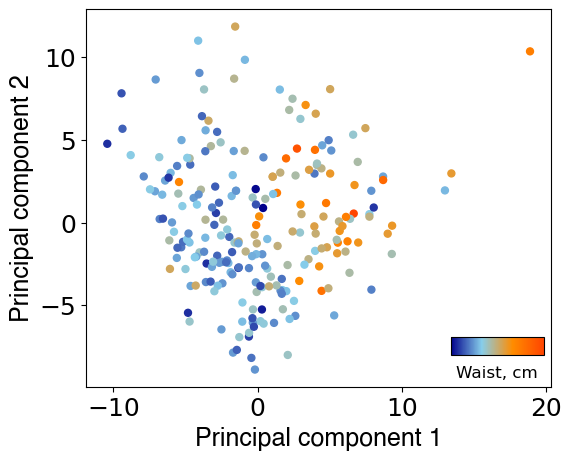

In [630]:
fig, ax = plt.subplots(figsize=[6, 7])

cmap = cmap_detailed

scatter = ax.scatter(components_nobmi[:,0], components_nobmi[:,1],
                     c=data_num['Waist_cm'], alpha=1, s=25, cmap=cmap,
                     #norm=colors.LogNorm(
                     #    vmin=data_num['Waist_cm'].min(), vmax=data_num['Waist_cm'].max()
                     #)
                    )

ax.grid(False)
ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
ax.tick_params(labelsize=18)

colorbar = fig.colorbar(scatter, ticks=[],
                        location='bottom',
                        anchor=(0.98, 3.1),
                        shrink=0.2, aspect=5)

colorbar.set_label('Waist, cm', loc='center', size=12)

if SAVE_FILES:
    plt.savefig('plots/behavioural_pca_cmap_detailed.svg')
plt.show()

### Clustering

#### Plotting functions

In [631]:
# Tweaking the code from the book to adjust the style

from matplotlib.colors import LogNorm

one_legend = True


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=60, linewidths=8,
                color=circle_color, zorder=10, alpha=0.5)
    x = 0
    y = 0
    centroids_text = centroids.copy() - 0.5
    for marker in [0, 1, 3, 8]:
        plt.text(centroids_text[x, 0], centroids_text[y, 1],
                 str(marker), fontsize=20,
                 color=cross_color,
                 zorder=11, alpha=1)
        x += 1
        y += 1
        
    if not one_legend:
        x = 0
        y = 0
        cluster_size_coordinates = np.array([[-10, -4.5],
                                             [9, -4.5],
                                             [-8, 10],
                                             [6, 10]])
        for cluster_size in [127, 34, 15, 52]:
            plt.text(cluster_size_coordinates[x, 0], cluster_size_coordinates[y, 1],
                     "N="+str(cluster_size), fontsize=15,
                     color=cross_color,
                     zorder=11, alpha=1)
            x += 1
            y += 1
    else:
        legend_coordinates = [12.5, -5]
        plt.text(legend_coordinates[0], legend_coordinates[1],
                 "0: N = 127\n1: N = 34\n3: N = 15\n8: N = 52", fontsize=11,
                 color=cross_color,
                 zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #plt.contourf(xx, yy, Z,
    #             norm=LogNorm(vmin=1.0, vmax=30.0),
    #             levels=np.logspace(0, 2, 12))
    #plt.contour(xx, yy, Z,
    #            norm=LogNorm(vmin=1.0, vmax=30.0),
    #            levels=np.logspace(0, 2, 12),
    #            linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=[6, 7])
    ax.contour(xx, yy, Z,
               linewidths=1, colors='black', linestyles='dashed')
    
    ax.scatter(X[:, 0], X[:, 1],
               c=data_num['Waist_cm'],
               alpha=1, s=25, cmap=cmap
              )
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
    if show_ylabels:
        ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
    else:
        ax.tick_params(labelleft=False)
    ax.tick_params(labelsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    colorbar = fig.colorbar(scatter, ticks=[],
                            location='bottom',
                            anchor=(0.97, 3.25),
                            shrink=0.2, aspect=5)
    colorbar.set_label('Waist, cm', loc='center', size=12)
    if SAVE_FILES:
        plt.savefig('plots/behavioural_clusters_cmap_detailed.svg')

#### Plot clustering

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_18678/707347950.py:84: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  colorbar = fig.colorbar(scatter, ticks=[],


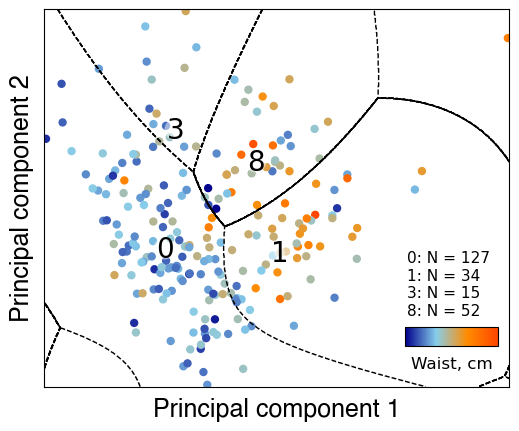

In [632]:
cmap = cmap_detailed
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 0, 3, 8, 1
plt.show()


In [635]:
bgm_cluster_on_pca_nobmi = bgm_on_pca_nobmi.predict(components_nobmi)
data_bgm_clustered_on_pca_nobmi = data_num.copy()
data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] = bgm_cluster_on_pca_nobmi
data_bgm_clustered_on_pca_nobmi.to_csv("processed_data/clustered_behavioral_LEMON_pca_based_nobmi.csv")

In [636]:
data_bgm_clustered_on_pca_nobmi.groupby('bgm_pca_cluster', as_index=False)['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI'].agg('mean')

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_18678/3214915997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bgm_clustered_on_pca_nobmi.groupby('bgm_pca_cluster', as_index=False)['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI'].agg('mean')


,bgm_pca_cluster,FEV_KK,FEV_STOER,FEV_HUNGER,BMI
0,0,5.267717,5.338583,5.543307,23.108337
1,1,8.846154,4.153846,3.307692,26.232232
2,3,5.142857,5.500000,4.285714,23.455754
3,7,5.000000,5.000000,4.000000,28.801077
4,8,7.617647,3.735294,3.088235,25.557152


#### ANOVA analysis of BMI between clusters

In [637]:
BMI_clust_0 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 0]['BMI'])
BMI_clust_1 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 1]['BMI'])
BMI_clust_3 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 3]['BMI'])
BMI_clust_8= np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 8]['BMI'])

from scipy.stats import f_oneway
f_oneway(BMI_clust_0, BMI_clust_1,
         BMI_clust_3, BMI_clust_8)

F_onewayResult(statistic=12.767456676580391, pvalue=9.906761284154145e-08)

In [638]:
from scipy.stats import tukey_hsd
bmi_hsd = tukey_hsd(BMI_clust_0, BMI_clust_1,
                    BMI_clust_3, BMI_clust_8)
pd.DataFrame(bmi_hsd.pvalue, columns=[0, 1, 3, 8], index=[0, 1, 3, 8])

,0,1,3,8
0,1.000000e+00,3.369872e-07,0.983274,0.001249
1,3.369872e-07,1.000000e+00,0.034137,0.801259
3,9.832739e-01,3.413731e-02,1.000000,0.206278
8,1.249491e-03,8.012595e-01,0.206278,1.000000
